In [1]:
import csv, datetime
from datetime import datetime
import pandas
from pandas import Series, DataFrame
import pandas as pd
import sqlite3
import matplotlib
%matplotlib inline
matplotlib.pyplot.plot
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 12
import geopandas
from shapely.geometry import Polygon, Point
import numpy as np
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

In [2]:
file = open('COVID-19_Historical_Data_Table.csv', encoding='utf-8')
file_reader = csv.reader(file)
data = list(file_reader)
header = data[0]
table = data[1:]

In [3]:
historical = DataFrame(table, columns= header)
historical

,﻿OBJECTID,GEOID,GEO,NAME,LoadDttm,NEGATIVE,POSITIVE,HOSP_YES,HOSP_NO,HOSP_UNK,...,DTH_E_HSP,DTH_E_NHSP,DTH_E_UNK,POS_HC_Y,POS_HC_N,POS_HC_UNK,DTH_NEW,POS_NEW,NEG_NEW,TEST_NEW
0,1,55,State,WI,1584298800000,313,32,,,,...,,,,,,,,,,
1,2,55001,County,Adams,1584298800000,,0,,,,...,,,,,,,,,,
2,3,55003,County,Ashland,1584298800000,,0,,,,...,,,,,,,,,,
3,4,55005,County,Barron,1584298800000,,0,,,,...,,,,,,,,,,
4,5,55007,County,Bayfield,1584298800000,,0,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35891,35892,55141011400,Census tract,,1588532400000,40,-999,,,,...,,,,,,,,,,
35892,35893,55141011500,Census tract,,1588532400000,38,-999,,,,...,,,,,,,,,,
35893,35894,55141011600,Census tract,,1588532400000,29,-999,,,,...,,,,,,,,,,
35894,35895,55141011700,Census tract,,1588532400000,37,-999,,,,...,,,,,,,,,,


In [4]:
def qry(sql):
    return pd.read_sql(sql,conn)

In [5]:
conn = sqlite3.connect('historical')
historical.to_sql("historical", conn, if_exists="replace", index=False)

In [6]:
filt = qry('''
SELECT NAME, DEATHS, POSITIVE, LoadDttm 
FROM historical
WHERE NAME == 'WI'

''')

In [7]:
for i in range(len(filt)):
    filt['LoadDttm'][i] = datetime.fromtimestamp(int(filt['LoadDttm'][i])/ 1e3)
    #filt['LoadDttm'][i] = filt['LoadDttm'][i].strftime("%x")
for i in range(len(filt)):
    filt['DEATHS'][i] = int(filt['DEATHS'][i])
for i in range(len(filt)):
    filt['POSITIVE'][i] = int(filt['POSITIVE'][i])

In [8]:
#us data
file = open('us.csv', encoding='utf-8')
file_reader = csv.reader(file)
data = list(file_reader)
header = data[0]
table = data[1:]
us = DataFrame(table, columns= header)
for i in range(len(us)):
    us['date'][i] = datetime.strptime(us['date'][i], '%Y-%m-%d')
for i in range(len(us)):
    us['cases'][i] = int(us['cases'][i]) /1000
for i in range(len(us)):
    us['deaths'][i] = int(us['deaths'][i])/1000

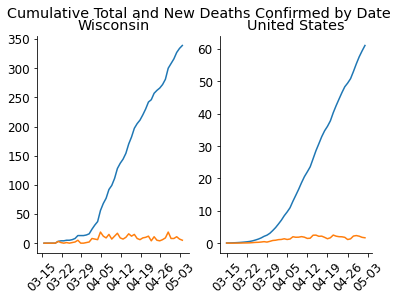

In [9]:
#deaths in wisconsin
dates = np.array(filt['LoadDttm'])
y = np.array(filt['DEATHS'])
#fig, ax = plt.subplots(figsize = (10,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Cumulative Total and New Deaths Confirmed by Date\n')
#ax.set_ylim(9000)
ax1.xaxis_date()
formatter = matplotlib.dates.DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(formatter)
myLocator = matplotlib.ticker.MultipleLocator(7)
ax1.xaxis.set_major_locator(myLocator)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.title.set_text('Wisconsin')
y2 = []
for i in range(len(y)):
    if i > 0:
        y2.append(y[i] - y[i-1])
    else: y2.append(y[i])
y2 = np.array(y2)
#plt.yscale("linear")
ax1.plot(dates, y)
ax1.plot(dates,y2)

#deaths in us
dates = np.array(us['date'][54:])
y = np.array(us['deaths'][54:])
ax2.xaxis_date()
formatter = matplotlib.dates.DateFormatter("%m-%d")
ax2.xaxis.set_major_formatter(formatter)
myLocator = matplotlib.ticker.MultipleLocator(7)
ax2.xaxis.set_major_locator(myLocator)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.title.set_text('United States')
y2 = []
for i in range(len(y)):
    if i > 0:
        y2.append(y[i] - y[i-1])
    else: y2.append(y[i])
y2 = np.array(y2)
#ax2.yscale("linear")
ax2.plot(dates, y)
ax2.plot(dates,y2)

for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
    
fig.savefig("deaths.svg", bbox_inches="tight")

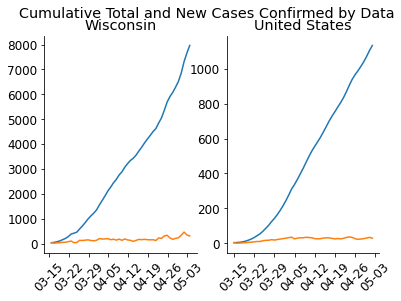

In [10]:
#cases in wisconsin
dates = np.array(filt['LoadDttm'])
y = np.array(filt['POSITIVE'])
#fig, ax = plt.subplots(figsize = (10,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Cumulative Total and New Cases Confirmed by Data\n')
#ax.set_ylim(9000)
ax1.xaxis_date()
formatter = matplotlib.dates.DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(formatter)
myLocator = matplotlib.ticker.MultipleLocator(7)
ax1.xaxis.set_major_locator(myLocator)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.title.set_text('Wisconsin')
y2 = []
for i in range(len(y)):
    if i > 0:
        y2.append(y[i] - y[i-1])
    else: y2.append(y[i])
y2 = np.array(y2)
#plt.yscale("linear")
ax1.plot(dates, y)
ax1.plot(dates,y2)

#deaths in us
dates = np.array(us['date'][54:])
y = np.array(us['cases'][54:])
ax2.xaxis_date()
formatter = matplotlib.dates.DateFormatter("%m-%d")
ax2.xaxis.set_major_formatter(formatter)
myLocator = matplotlib.ticker.MultipleLocator(7)
ax2.xaxis.set_major_locator(myLocator)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.title.set_text('United States')
y2 = []
for i in range(len(y)):
    if i > 0:
        y2.append(y[i] - y[i-1])
    else: y2.append(y[i])
y2 = np.array(y2)
#ax2.yscale("linear")
ax2.plot(dates, y)
ax2.plot(dates,y2)

for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
fig.savefig("cases.svg", bbox_inches="tight")

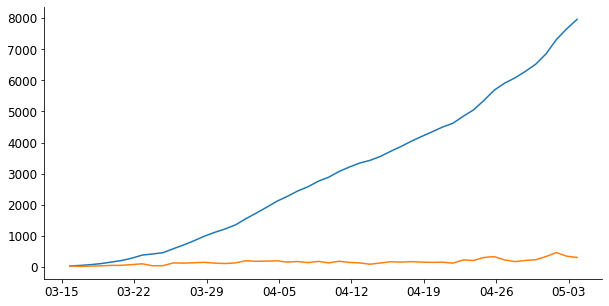

In [11]:
#cases in wisconsin
dates = np.array(filt['LoadDttm'])
y = np.array(filt['POSITIVE'])
fig, ax2 = plt.subplots(figsize = (10,5))
#ax.set_ylim(9000)
ax2.xaxis_date()
formatter = matplotlib.dates.DateFormatter("%m-%d")
ax2.xaxis.set_major_formatter(formatter)
myLocator = matplotlib.ticker.MultipleLocator(7)
ax2.xaxis.set_major_locator(myLocator)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
y2 = []
for i in range(len(y)):
    if i > 0:
        y2.append(y[i] - y[i-1])
    else: y2.append(y[i])
y2 = np.array(y2)
plt.yscale("linear")
plt.plot(dates, y)
plt.plot(dates,y2)


In [12]:
file = open('us.csv', encoding='utf-8')
file_reader = csv.reader(file)
data = list(file_reader)
header = data[0]
table = data[1:]

In [13]:
us = DataFrame(table, columns= header)
us

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
98,2020-04-28,1012572,53034
99,2020-04-29,1039166,55399
100,2020-04-30,1069559,57570
101,2020-05-01,1103544,59392


In [14]:
for i in range(len(us)):
    us['date'][i] = datetime.strptime(us['date'][i], '%Y-%m-%d')
for i in range(len(us)):
    us['cases'][i] = int(us['cases'][i]) /1000
for i in range(len(us)):
    us['deaths'][i] = int(us['deaths'][i])/1000

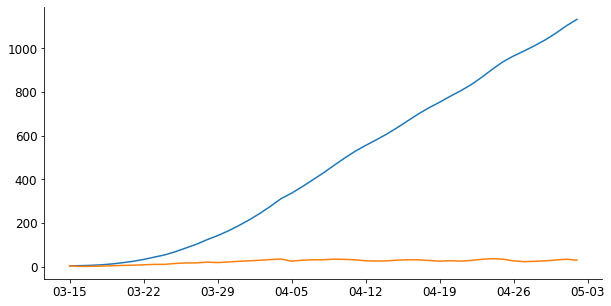

In [15]:
#cases in us
dates = np.array(us['date'][54:])
y = np.array(us['cases'][54:])
fig, ax = plt.subplots(figsize = (10,5))
#ax.set_ylim(9000)
ax.xaxis_date()
formatter = matplotlib.dates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
myLocator = matplotlib.ticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
y2 = []
for i in range(len(y)):
    if i > 0:
        y2.append(y[i] - y[i-1])
    else: y2.append(y[i])
y2 = np.array(y2)
plt.yscale("linear")
plt.plot(dates, y)
plt.plot(dates,y2)

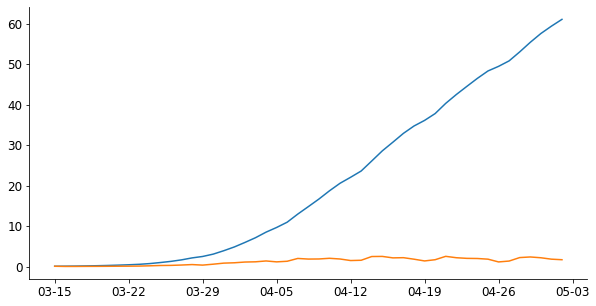

In [16]:
#deaths in us
dates = np.array(us['date'][54:])
y = np.array(us['deaths'][54:])
fig, ax = plt.subplots(figsize = (10,5))
ax.xaxis_date()
formatter = matplotlib.dates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
myLocator = matplotlib.ticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
y2 = []
for i in range(len(y)):
    if i > 0:
        y2.append(y[i] - y[i-1])
    else: y2.append(y[i])
y2 = np.array(y2)
plt.yscale("linear")
plt.plot(dates, y)
plt.plot(dates,y2)

In [17]:
wisdeath = list(filt['DEATHS'])
wiscase = list(filt['POSITIVE'])
usdeath = list(us['deaths'][54:]*1000)
uscases = list(us['cases'][54:]*1000)

In [18]:
def increase_by_week(data):
    increases = []
    for i in range(len(data)):
        if i % 7 == 0:
            if i > 0:
                increases.append(float((data[i] - last)/data[i])*100)
            last = data[i]
    return increases

def Average(lst): 
    return sum(lst) / len(lst)                

In [19]:

print(Average(increase_by_week(wisdeath)))
print(Average(increase_by_week(wiscase)))
print(Average(increase_by_week(usdeath)))
print(Average(increase_by_week(uscases)))


53.75971619334451
45.11602730857692
60.54393533679013
51.87276234621254
